In [10]:
import pandas as pd
from textblob import TextBlob
from textblob import Word
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
s0 = "Good looking average product by Honor. For 2000 bucks, it is really a good option to buy. Easy to use and looks durable"
s1 = "Among the best premium wireless headphones. Must buy-product"
s2 = "No refund received for microwave oven, delivery guys was quite ignorant to our complaints and queries"
s3 = "Very bad experience with the router. Cables are completely damaged"
s4 = "Purchased the product based on Mi Brand. Product proves to be a disappointment. Worst Led TV in the market.Pathetic after sales service"
s5 = "This earbuds are awesome. Completely value for money"

In [3]:
sentence = TextBlob(s0)
sentence.sentiment # Sentence is fairly positive here.

Sentiment(polarity=0.42083333333333334, subjectivity=0.6083333333333334)

In [4]:
rev_list = [s0,s1,s2,s3,s4,s5]
new_list = []
for i in rev_list:
    new_list.append(i)

    
sample = pd.DataFrame(new_list, columns = ['reviews'])
sample['ratings'] = [1,1,0,0,0,1]
sample.head(6)

,reviews,ratings
0,Good looking average product by Honor. For 200...,1
1,Among the best premium wireless headphones. Mu...,1
2,"No refund received for microwave oven, deliver...",0
3,Very bad experience with the router. Cables ar...,0
4,Purchased the product based on Mi Brand. Produ...,0
5,This earbuds are awesome. Completely value for...,1


In [5]:
def detect_polarity(col):
    return TextBlob(col).sentiment.polarity
def detect_subjectivity(col):
    return TextBlob(col).sentiment.subjectivity
def get_lemma(col):
    lemma_list = []
    text = TextBlob(col).words
    for item in text:
        lemma = Word(item).lemmatize()
        lemma_list.append(lemma)
    return lemma_list

In [6]:
filter_method = lambda x:'Highly Positive' if x >= 0.5 else 'Fairly Positive' if (x > 0 and x < 0.5) else 'Highly Negative' if x <= -0.5 else 'Fairly Negative' if (x > -0.5 and x < 0) else 'Neutral'

In [7]:
sample['polarity'] = round(sample.reviews.apply(detect_polarity),1)
sample['subjectivity'] = round(sample.reviews.apply(detect_subjectivity),1)
sample['sentiment'] = sample['polarity'].apply(filter_method)
sample['lemma'] = sample.reviews.apply(get_lemma)
sample.head(6)

,reviews,ratings,polarity,subjectivity,sentiment,lemma
0,Good looking average product by Honor. For 200...,1,0.4,0.6,Fairly Positive,"[Good, looking, average, product, by, Honor, F..."
1,Among the best premium wireless headphones. Mu...,1,1.0,0.3,Highly Positive,"[Among, the, best, premium, wireless, headphon..."
2,"No refund received for microwave oven, deliver...",0,0.0,0.0,Neutral,"[No, refund, received, for, microwave, oven, d..."
3,Very bad experience with the router. Cables ar...,0,-0.4,0.6,Fairly Negative,"[Very, bad, experience, with, the, router, Cab..."
4,Purchased the product based on Mi Brand. Produ...,0,-0.4,0.5,Fairly Negative,"[Purchased, the, product, based, on, Mi, Brand..."
5,This earbuds are awesome. Completely value for...,1,0.6,0.7,Highly Positive,"[This, earbuds, are, awesome, Completely, valu..."


Polarity is float which lies within range of [-1,1]. Values closer to 1 have a highly positive sentiment and values closer to -1 have highly negative sentiment. Values closer to 0 on the either sides shows slighty positive and negative indication.

Similarly, subjective sentences refer to personal opinion, emotion or judgement whereas objective refers to facts. Subjectivity is also a float which lies in the range of [0,1]

In [8]:
sample.sentiment.value_counts()

Fairly Negative    2
Highly Positive    2
Fairly Positive    1
Neutral            1
Name: sentiment, dtype: int64

num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(sample.sentiment, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

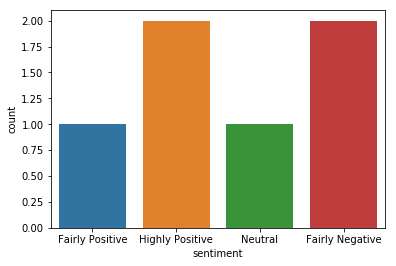

In [13]:
sns.countplot(x='sentiment', data=sample);